In [1]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential,Model
from keras.layers.convolutional import Convolution2D, MaxPooling2D,SeparableConv2D,DepthwiseConv2D,Conv3D
#from keras.layers.SeparableConv2D import SeparableConv2D
#from keras.layers.DepthwiseConv2D import depth2d
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils

Using TensorFlow backend.


In [2]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

170500096/170498071 [==============================] - 2s 0us/step


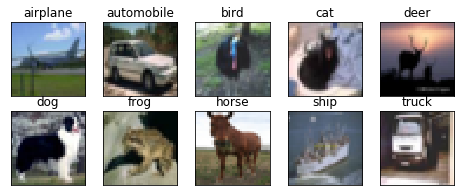

In [4]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

Enas using spatially seperable

In [0]:
def space_to_depth_x2(x):
  import tensorflow as tf
  return tf.space_to_depth(x,block_size=2)

def space_to_depth_x3(x):
  import tensorflow as tf
  return tf.space_to_depth(x,block_size=4)


In [9]:
# Shared Input Layer
from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D, Conv1D ,SeparableConv2D ,DepthwiseConv2D ,Conv3D
from keras.layers.pooling import MaxPooling2D
from keras.layers.merge import concatenate
from keras.layers import Lambda

#from keras.layers import Merge

input1 = Input(shape=(32,32,3))
#conv1 = Conv2D(32, 3, 3 , border_mode='same',activation='relu')(visible) #3
#conv1 = DepthwiseConv2D(5,5)(visible)
#conv1 = SeparableConv2D(32,1,1,border_mode='same')(visible)                            #3
#------------
conv1 = Conv2D(32, 5, 1 , border_mode='same',activation='relu')(input1)
conv1 = Conv2D(32, 1, 5 , border_mode='same',activation='relu')(conv1)
conv1=BatchNormalization()(conv1)
#-------------
conv2 = Conv2D(32, 5, 5 , border_mode='same',activation='relu')(conv1) #5
conv2=BatchNormalization()(conv2)
#--------------
conv3 = Conv2D(64, 5, 5 , border_mode='same',activation='relu')(conv2) #7
conv3=BatchNormalization()(conv3)
#--------------------
conv4 = Conv2D(96, 5, 1 , border_mode='same',activation='relu')(conv3)
conv4 = Conv2D(96, 1, 5 , border_mode='same',activation='relu')(conv4)
conv4=BatchNormalization()(conv4)

add1 = concatenate([conv1 , conv4])
#----------------------
pool1 = MaxPooling2D(pool_size=(2, 2))(add1)
pool1 = Convolution2D(32, 1, 1, activation='relu')(pool1)


#conv1_A26 = Lambda(space_to_depth_x2(conv7))
#add26 = concatenate([conv7 , pool1])

conv1_A_MP = Lambda(space_to_depth_x2)(conv1)
add2 = concatenate([conv1_A_MP , pool1])


#output = Flatten()(add2)

#add_concat1 = concatenate([add26 , add2]) 
#-------------------------
conv5 = Conv2D(32, 5, 1 , border_mode='same',activation='relu')(add2)
conv5 = Conv2D(32, 1, 5 , border_mode='same',activation='relu')(conv5)
conv5=BatchNormalization()(conv5)
#add32 = concatenate([pool1 , conv5])

#---------------------------
conv6 = Conv2D(64, 5, 5 , border_mode='same',activation='relu')(conv5)
conv6=BatchNormalization()(conv6)

conv1_A=Conv2D(32, 2, strides=2 ,activation='relu')(conv1)
#add3 = concatenate([conv1_A , conv6])

conv1_A10 = Lambda(space_to_depth_x2)(conv4)
#add12 = concatenate([conv1_A10 , conv6])

add_concat2 = concatenate([conv6 , conv1_A, conv1_A10 ])

#---------------------------
conv7 = Conv2D(96, 5, 1 , border_mode='same',activation='relu')(add_concat2)
conv7 = Conv2D(96, 1, 5 , border_mode='same',activation='relu')(conv7)
conv7=BatchNormalization()(conv7)

conv1_A6 = Lambda(space_to_depth_x2)(conv3)
#add8 = concatenate([conv1_A6 , conv7])

#add19 = concatenate([conv5 , conv7])

conv1_A11 = Lambda(space_to_depth_x2)(conv4)
#add13 = concatenate([conv1_A11 , conv7])

add_concat3 = concatenate([conv7 , conv1_A6, conv1_A11])
#----------------------------------
conv8 = Conv2D(192, 5, 1 , border_mode='same',activation='relu')(add_concat3)
conv8 = Conv2D(192, 1, 5 , border_mode='same',activation='relu')(conv8)
conv8=BatchNormalization()(conv8)

conv1_A7 = Lambda(space_to_depth_x2)(conv3)
#add9 = concatenate([conv1_A7 , conv8])

conv1_A1 = Lambda(space_to_depth_x2)(conv1)
#add4 = concatenate([conv1_A1 , conv8])

conv1_A12 = Lambda(space_to_depth_x2)(conv4)
#add14 = concatenate([conv1_A12 , conv8])

#add20 = concatenate([conv5 , conv8])

#add22_1 = concatenate([conv6 , conv8])

add_concat4 = concatenate([conv8 , conv1_A7, conv1_A1 , conv1_A12 , conv5,conv6 ])
#--------------------
pool2 = MaxPooling2D(pool_size=(2, 2))(add_concat4)
pool2 = Convolution2D(32, 1, 1, activation='relu')(pool2)

conv1_A21= Lambda(space_to_depth_x2)(conv5)
#add23 = concatenate([conv1_A21 , pool2])

conv1_A2 = Lambda(space_to_depth_x3)(conv1)
#add4_1 = concatenate([conv1_A2 , pool2])

conv1_A15 = Lambda(space_to_depth_x3)(conv4)
#add17 = concatenate([conv1_A15 , pool2])

conv1_A28 = Lambda(space_to_depth_x2)(conv8)
#add28 = concatenate([conv1_A28 , pool2])

add_concat5 = concatenate([pool2 , conv1_A21, conv1_A2 , conv1_A15,conv1_A28])
#-----------------------
conv9 = Conv2D(64, 5, 5 , border_mode='same',activation='relu')(add_concat5)
conv9=BatchNormalization()(conv9)

conv1_A23= Lambda(space_to_depth_x2)(conv6)
#add23_1 = concatenate([conv1_A23 , conv9])

#add33 = concatenate([pool2 , conv9, ])

add_concat6 = concatenate([conv9 , pool2,conv1_A23 ])

#------------------
conv10 = Conv2D(96, (5, 1) , padding='same',activation='relu')(add_concat6)
conv10 = Conv2D(96, (1, 5) , padding='same',activation='relu')(conv10)
conv10=BatchNormalization()(conv10)

conv1_A3 = Lambda(space_to_depth_x3)(conv1)
#add5 = concatenate([conv1_A3 , conv10])

conv1_A4 = Lambda(space_to_depth_x3)(conv2)
#add6 = concatenate([conv1_A4 , conv10])

conv1_A13 = Lambda(space_to_depth_x3)(conv4)
#add15 = concatenate([conv1_A13 , conv10])

conv1_A24 = Lambda(space_to_depth_x2)(conv7)
#add24 = concatenate([conv1_A24 , conv10])

#add26 = concatenate([conv9 , conv10])

add_concat6 = concatenate([conv10 , conv1_A3 , conv1_A4 , conv1_A13 , conv1_A24])

#--------------
conv11 = Conv2D(192, 3, 3 , border_mode='same',activation='relu')(add_concat6)
conv11=BatchNormalization()(conv11)

conv1_A5 = Lambda(space_to_depth_x3)(conv2)
#add7 = concatenate([conv1_A5 , conv11])

conv1_A8 = Lambda(space_to_depth_x3)(conv3)
#add10 = concatenate([conv1_A8 , conv11])

conv1_A19 = Lambda(space_to_depth_x2)(conv5)
#add21 = concatenate([conv1_A19 , conv11])

#add27 = concatenate([conv9 , conv11])
#conv12 = DepthwiseConv2D(5,5)(conv11)

add_concat7 = concatenate([conv1_A5 , conv1_A8 , conv1_A19 , conv11])
#-----------------------
conv12 = Conv2D(225, (5, 1) , padding='same',activation='relu')(add_concat7)
conv12 = Conv2D(225, (1, 5) , padding='same',activation='relu')(conv12)
conv12=BatchNormalization()(conv12)

conv1_A25 = Lambda(space_to_depth_x2)(conv7)
#add25 = concatenate([conv1_A25 ,conv12])

conv1_A9 = Lambda(space_to_depth_x3)(conv3)
#add11 = concatenate([conv1_A9 , conv12])
#conv12 = SeparableConv2D(32,5,5,border_mode='same')(conv11)

conv1_A14 = Lambda(space_to_depth_x3)(conv4)
#add16 = concatenate([conv1_A14 , conv12])

conv1_A20 = Lambda(space_to_depth_x2)(conv5)
#add22 = concatenate([conv1_A20 , conv12])


#add28 = concatenate([conv10 , conv12])

#add30 = concatenate([conv11 , conv12])

add_concat8 = concatenate([conv12 , conv1_A25 , conv1_A9 , conv1_A14,conv1_A20 ,conv10,conv11 ])
#-----------------

kk = Activation("softmax")(add_concat8)

conv1_A16= Lambda(space_to_depth_x3)(conv4)
#add18 = concatenate([conv1_A16 , kk])

conv1_A27= Lambda(space_to_depth_x2)(conv7)
#add27 = concatenate([conv1_A27 , kk])

#add29 = concatenate([conv10 , kk])

#add31 = concatenate([conv12 , kk])

add_concat9 = concatenate([kk , conv1_A16 , conv1_A27 , conv10 ,conv12 ])
#Skip connections



#conv1_A_MP = space_to_depth_x2(conv1)
#add2 = concatenate([conv1_A_MP , pool1])

#add3 = concatenate([conv1 , conv5])
#add4 = concatenate([conv1 , conv8])
#add5 = concatenate([conv1 , conv12])

#conv1_A=Conv2D(32, 2, strides=2 ,activation='relu')(conv1)
#add3 = concatenate([conv1_A , conv6])

#conv1_A1 = space_to_depth_x2(conv1)
#add4 = concatenate([conv1_A1 , conv8])

#conv1_A2 = space_to_depth_x3(conv1)
#add4_1 = concatenate([conv1_A2 , pool2])

#conv1_A3 = space_to_depth_x3(conv1)
#add5 = concatenate([conv1_A3 , conv10])

#------------------
#conv1_A4 = space_to_depth_x3(conv2)
#add6 = concatenate([conv1_A4 , conv10])

#conv1_A5 = space_to_depth_x3(conv2)
#add7 = concatenate([conv1_A5 , conv11])
#---------------------------
#conv1_A6 = space_to_depth_x2(conv3)
#add8 = concatenate([conv1_A6 , conv7])

#conv1_A7 = space_to_depth_x2(conv3)
#add9 = concatenate([conv1_A7 , conv8])

#conv1_A8 = space_to_depth_x3(conv3)
#add10 = concatenate([conv1_A8 , conv11])

#conv1_A9 = space_to_depth_x3(conv3)
#add11 = concatenate([conv1_A9 , conv12])

#---------------------------
#conv1_A10 = space_to_depth_x2(conv4)
#add12 = concatenate([conv1_A10 , conv6])

#conv1_A11 = space_to_depth_x2(conv4)
#add13 = concatenate([conv1_A11 , conv7])

#conv1_A12 = space_to_depth_x2(conv4)
#add14 = concatenate([conv1_A12 , conv8])

#conv1_A13 = space_to_depth_x3(conv4)
#add15 = concatenate([conv1_A13 , conv10])

#conv1_A14 = space_to_depth_x3(conv4)
#add16 = concatenate([conv1_A14 , conv12])

#conv1_A15 = space_to_depth_x3(conv4)
#add17 = concatenate([conv1_A15 , pool2])

#conv1_A16= space_to_depth_x3(conv4)
#add18 = concatenate([conv1_A16 , kk])
#----------------------------------
#conv1_A17 = space_to_depth_x2(conv5)----x


#add19 = concatenate([conv5 , conv7])

#conv1_A18 = space_to_depth_x2(conv5) -----x
#add20 = concatenate([conv5 , conv8])

#conv1_A19 = space_to_depth_x2(conv5)
#add21 = concatenate([conv1_A19 , conv11])

#conv1_A20 = space_to_depth_x2(conv5)
#add22 = concatenate([conv1_A20 , conv12])

#conv1_A21= space_to_depth_x2(conv5)
#add23 = concatenate([conv1_A21 , pool2])
#--------------------------

#add22_1 = concatenate([conv6 , conv8])

#conv1_A23= space_to_depth_x2(conv6)
#add23_1 = concatenate([conv1_A23 , conv9])

#------------------------------

#conv1_A24 = space_to_depth_x2(conv7)
#add24 = concatenate([conv1_A24 , conv10])

#conv1_A25 = space_to_depth_x2(conv7)
#add25 = concatenate([conv1_A25 ,conv12])

#conv1_A26 = space_to_depth_x2(conv7)
#add26 = concatenate([conv7 , pool1])

#conv1_A27= space_to_depth_x2(conv7)
#add27 = concatenate([conv1_A27 , kk])

#-----------------------
#conv1_A28 = space_to_depth_x2(conv8)
#add28 = concatenate([conv1_A28 , pool2])

#-------------------------
#conv1_A29 = space_to_depth_x2(conv9)
#add26 = concatenate([conv9 , conv10])

#conv1_A30= space_to_depth_x2(conv7)

#add27 = concatenate([conv9 , conv11])

#---------------------------
#add28 = concatenate([conv10 , conv12])

#conv1_A30= space_to_depth_x2(conv7)
#add29 = concatenate([conv10 , kk])

#-----------------------------
#add30 = concatenate([conv11 , conv12])

#------------------
#add31 = concatenate([conv12 , kk])
#-------------------
#add32 = concatenate([pool1 , conv5])

#----------------------
#add33 = concatenate([pool2 , conv9])
kk1 = Convolution2D(32, (1,1), activation='relu')(add_concat9)
kk1 = Convolution2D(16, (8,8), activation='relu')(kk1)
kk1 = BatchNormalization()(kk1)
kk1 = Convolution2D(10, (1,1), activation='relu')(kk1)
kk1 = Activation('softmax')(kk1)
kk1 = Flatten()(kk1)
output = kk1

#output = Flatten()(kk1)


W0621 13:12:30.312353 140688831223680 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0621 13:12:30.349642 140688831223680 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (5, 1), activation="relu", padding="same")`
W0621 13:12:30.360254 140688831223680 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Conv2D` call 

In [10]:
#model = Sequential()

model = Model(inputs=[input1], outputs=[output])
model.summary()
#print(datetime.datetime.now())

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 32, 32, 32)   512         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 32, 32, 32)   5152        conv2d_1[0][0]                   
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 32, 32, 32)   128         conv2d_2[0][0]                   
__________________________________________________________________________________________________
conv2d_3 (

In [11]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

W0621 13:12:57.798454 140688831223680 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., callbacks=[<keras.ca..., verbose=1, steps_per_epoch=390, epochs=50)`
W0621 13:13:05.704271 140688831223680 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future

Epoch 1/50
390/390 [==============================] - 152s 389ms/step - loss: 1.4898 - acc: 0.5072 - val_loss: 1.3558 - val_acc: 0.5418

Epoch 00001: val_acc improved from -inf to 0.54180, saving model to saved4.hdf5
Epoch 2/50
390/390 [==============================] - 145s 373ms/step - loss: 0.8519 - acc: 0.7106 - val_loss: 0.9773 - val_acc: 0.6660

Epoch 00002: val_acc improved from 0.54180 to 0.66600, saving model to saved4.hdf5
Epoch 3/50
390/390 [==============================] - 142s 363ms/step - loss: 0.6133 - acc: 0.7934 - val_loss: 0.7472 - val_acc: 0.7475

Epoch 00003: val_acc improved from 0.66600 to 0.74750, saving model to saved4.hdf5
Epoch 4/50
390/390 [==============================] - 141s 362ms/step - loss: 0.4513 - acc: 0.8505 - val_loss: 0.7430 - val_acc: 0.7511

Epoch 00004: val_acc improved from 0.74750 to 0.75110, saving model to saved4.hdf5
Epoch 5/50
390/390 [==============================] - 141s 362ms/step - loss: 0.3108 - acc: 0.8981 - val_loss: 0.8533 - val

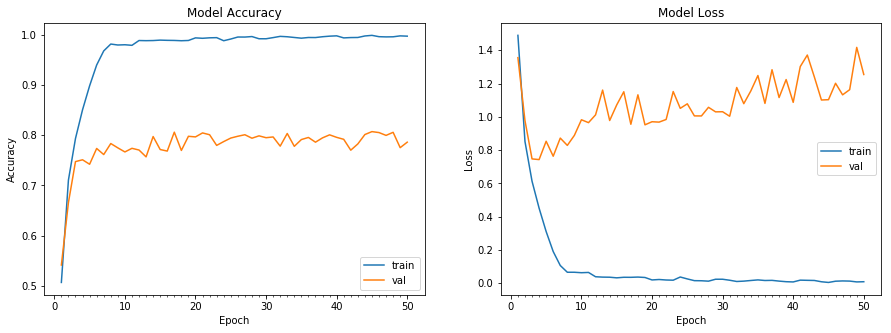

Accuracy on test data is: 78.61


In [12]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)

from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler, ModelCheckpoint
# train the model
start = time.time()

filepath="saved4.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels),callbacks= callbacks_list, verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

In [16]:
from keras.models import load_model
model = load_model('saved4.hdf5')
score = model.evaluate(test_features, test_labels, verbose=0)
print(score)

[1.1031488708496093, 0.8072]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., callbacks=[<keras.ca..., verbose=1, steps_per_epoch=390, epochs=50)`


Epoch 1/50
390/390 [==============================] - 144s 370ms/step - loss: 0.0037 - acc: 0.9990 - val_loss: 1.1941 - val_acc: 0.8010

Epoch 00001: val_acc improved from -inf to 0.80100, saving model to saved4.hdf5
Epoch 2/50
390/390 [==============================] - 142s 363ms/step - loss: 0.0153 - acc: 0.9951 - val_loss: 1.3357 - val_acc: 0.7873

Epoch 00002: val_acc did not improve from 0.80100
Epoch 3/50
390/390 [==============================] - 141s 361ms/step - loss: 0.0237 - acc: 0.9920 - val_loss: 1.0912 - val_acc: 0.8057

Epoch 00003: val_acc improved from 0.80100 to 0.80570, saving model to saved4.hdf5
Epoch 4/50
390/390 [==============================] - 141s 361ms/step - loss: 0.0120 - acc: 0.9962 - val_loss: 1.1118 - val_acc: 0.7994

Epoch 00004: val_acc did not improve from 0.80570
Epoch 5/50
390/390 [==============================] - 141s 362ms/step - loss: 0.0061 - acc: 0.9981 - val_loss: 1.0335 - val_acc: 0.8148

Epoch 00005: val_acc improved from 0.80570 to 0.8148

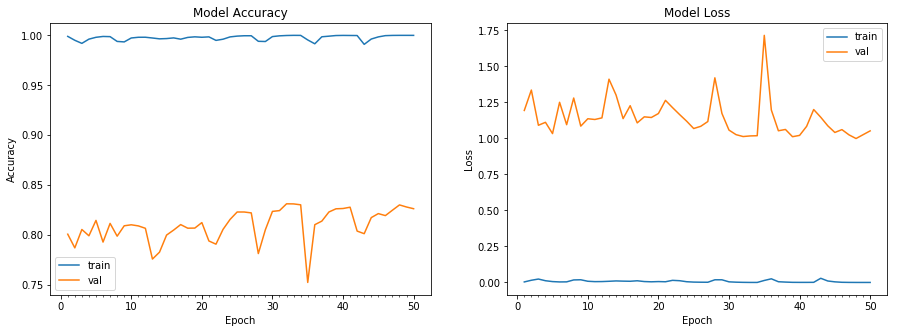

Accuracy on test data is: 82.65


In [17]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)

from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler, ModelCheckpoint
# train the model
start = time.time()

filepath="saved4.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels),callbacks= callbacks_list, verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

In [18]:
from keras.models import load_model
model = load_model('saved4.hdf5')
score = model.evaluate(test_features, test_labels, verbose=0)
print(score)

[1.0130141620397568, 0.8314]
